# Проект по логистической регрессии

**Задача: Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
df = pd.read_csv('./heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

### Анализ данных и визуализация данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Визуализация данных

<AxesSubplot:xlabel='target', ylabel='count'>

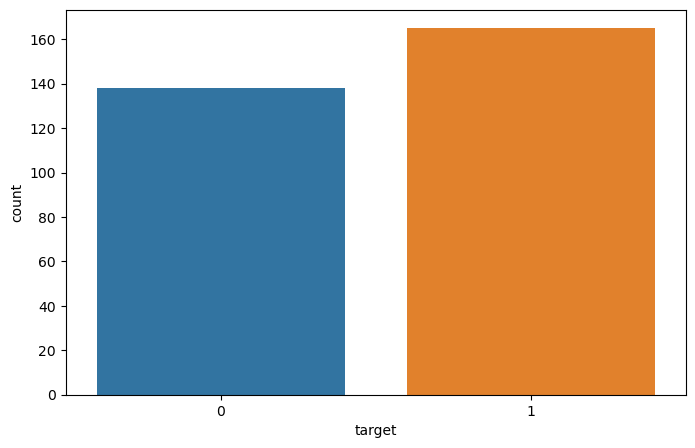

In [13]:
# Количество точек для каждого значения target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')

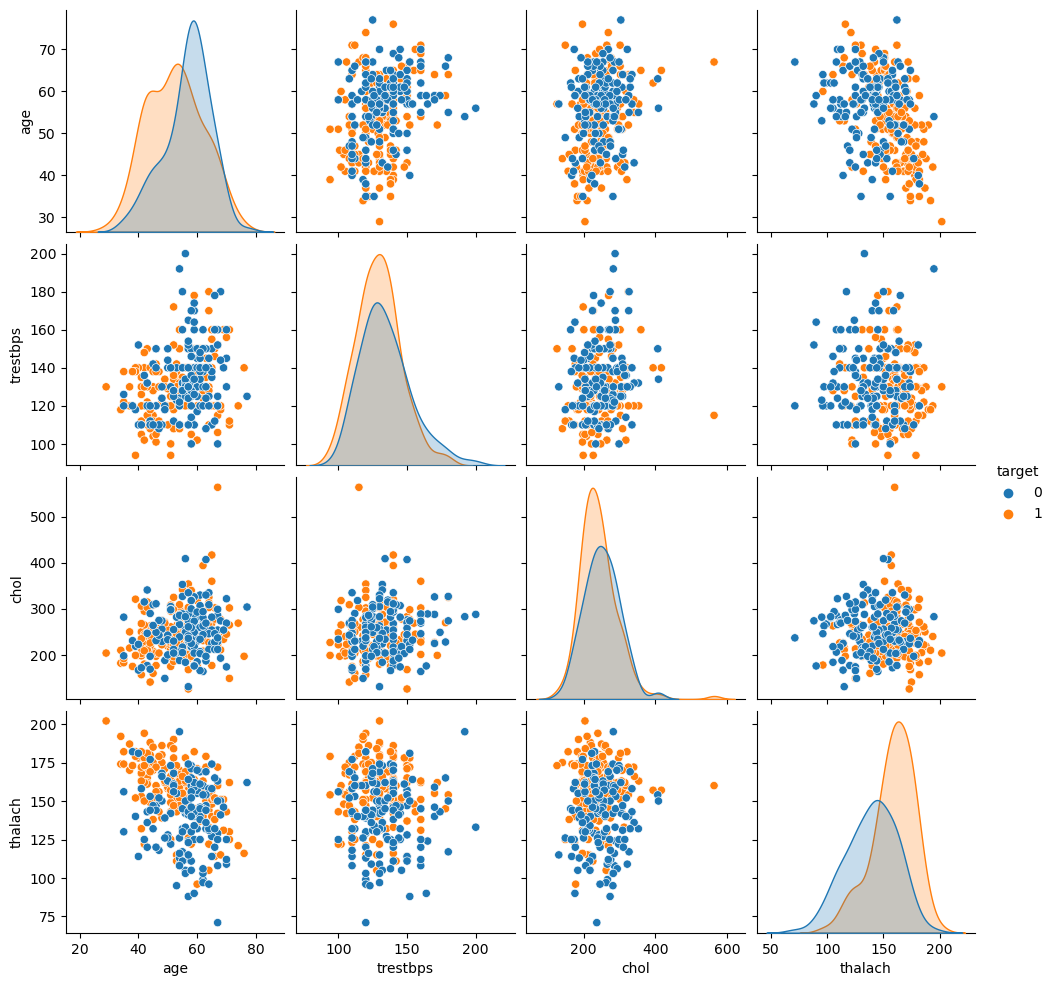

In [ ]:
sns.pairplot(data=df, 
             vars=['age', 'trestbps', 'chol', 'thalach'],
             hue='target',
             )

<AxesSubplot:>

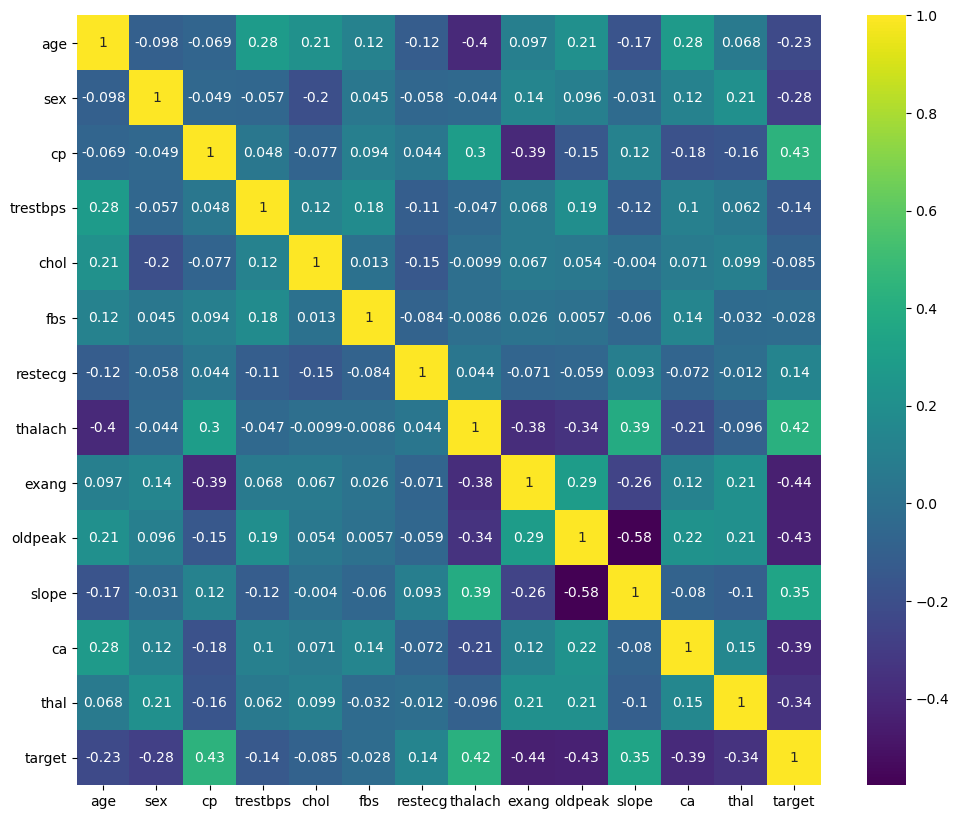

In [23]:
# Корреляции между всеми колонками
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(),
            annot=True,
            cmap='viridis')


----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных



In [25]:
X = df.drop('target', axis=1)
y = df['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [60]:
logistic_regression_model = LogisticRegression(penalty='elasticnet', solver='saga')

In [106]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': np.linspace(0, 1, 20)}

grid_model = GridSearchCV(estimator=logistic_regression_model,
                          param_grid=param_grid)

In [107]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='elasticnet', solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])})

In [117]:
grid_model.best_params_

{'C': 1, 'l1_ratio': 0.5789473684210527}

In [161]:
y_pred = grid_model.predict(scaled_X_test)

### Коэффициенты

In [118]:
best_model = grid_model.best_estimator_
best_model.coef_

array([[-0.05807873, -0.71303862,  0.89036885, -0.24901885, -0.19762339,
         0.02100074,  0.10609109,  0.42677463, -0.41680239, -0.5248825 ,
         0.368082  , -0.84023161, -0.56867463]])

In [156]:
coefs = pd.DataFrame(data={'feature': X.columns,'coef': best_model.coef_[0]})
coefs = coefs.sort_values(by='coef')
coefs


,feature,coef
11,ca,-0.840232
1,sex,-0.713039
12,thal,-0.568675
9,oldpeak,-0.524883
8,exang,-0.416802
3,trestbps,-0.249019
4,chol,-0.197623
0,age,-0.058079
5,fbs,0.021001
6,restecg,0.106091


<AxesSubplot:xlabel='feature', ylabel='coef'>

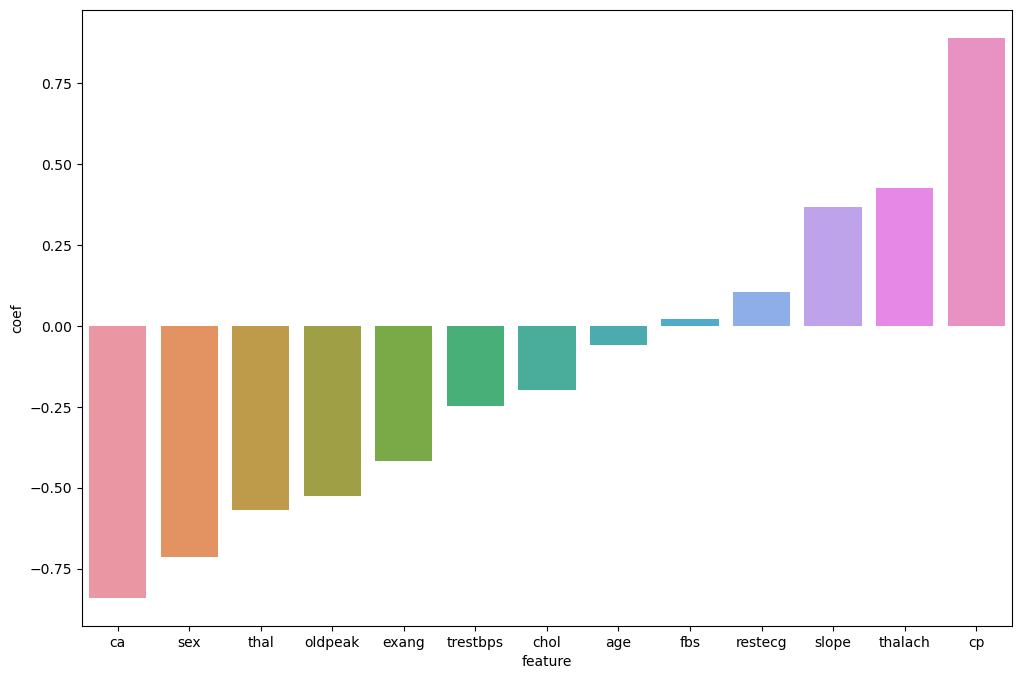

In [159]:
plt.figure(figsize=(12, 8))
sns.barplot(data=coefs, x='feature', y='coef')

---------

## Оценка модели

In [160]:
from sklearn.metrics import confusion_matrix, classification_report

In [165]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[12,  3],
       [ 2, 14]])

Text(50.722222222222214, 0.5, 'True label')

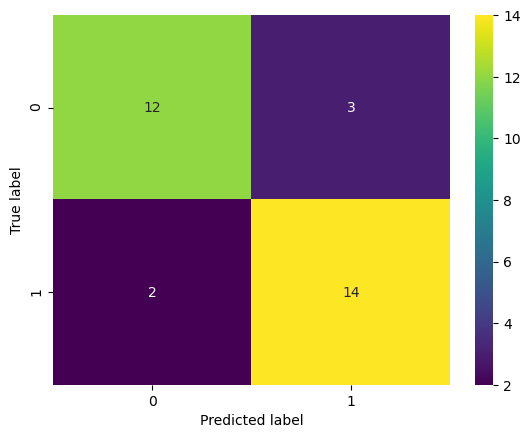

In [174]:
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [176]:
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [190]:
y_pred_proba = grid_model.predict_proba(scaled_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9541666666666667

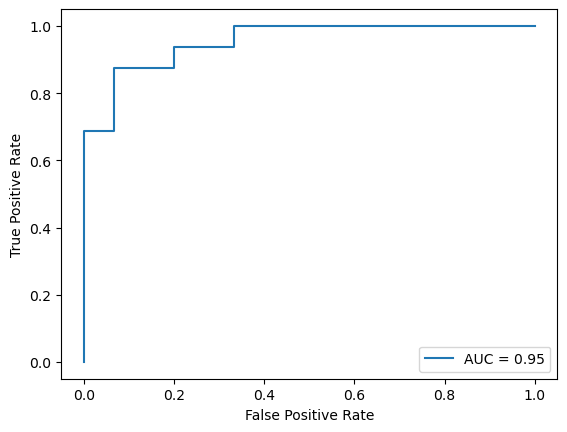

In [216]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc.plot()

In [210]:
from sklearn.metrics import plot_precision_recall_curve

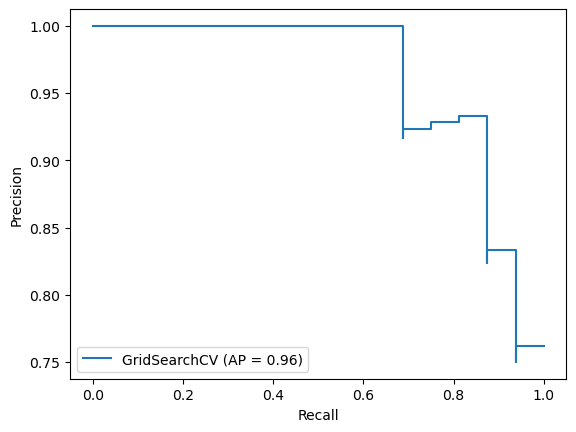

In [ ]:
# precision-recall curve
plot_precision_recall_curve(grid_model,scaled_X_test,y_test)